Задание 1
На основании датасета для каждого покупателя получите:
предпочитаемый метод оплаты; 
общие траты;
количество денег, потраченных на дополнительные услуги и аксессуары. 

In [5]:
import pandas as pd

df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", sep=",")
#df.head(5)

df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [8]:
df['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [20]:
#предпочитаемый метод оплаты; 

pref_pay = df.groupby('Customer ID')['Payment Method'].agg(lambda x: x.mode()[0])

pref_pay = pd.DataFrame(pref_pay)

pref_pay

,Payment Method
Customer ID,
1000,Credit Card
1002,Cash
1003,Cash
1004,Credit Card
1005,Debit Card
...,...
19994,Bank Transfer
19995,Credit Card
19996,Bank Transfer


In [23]:
#общие траты;

sum_total_price = df.groupby('Customer ID').agg({
    'Total Price': 'sum'
}).round(2)

sum_total_price

,Total Price
Customer ID,
1000,6279.42
1002,5020.60
1003,41.50
1004,83.00
1005,11779.11
...,...
19994,5504.87
19995,5394.56
19996,27296.78


In [25]:
# количество денег, потраченных на дополнительные услуги и аксессуары

sum_add_price = df.groupby('Customer ID').agg({
    'Add-on Total': 'sum'
}).round(2)

sum_add_price

,Add-on Total
Customer ID,
1000,66.30
1002,60.16
1003,35.56
1004,65.78
1005,75.33
...,...
19994,93.17
19995,0.00
19996,432.12


Задание 2
1. На основании датасета получите доход:
по каждому методу доставки, 
по каждому типу продукта, 
по дополнительным услугам за каждый месяц,
по дополнительным услугам за каждый квартал. 
2. Отобразите полученные данные на графике.

In [37]:
#На основании датасета получите доход:
#по каждому методу доставки

ship_type = df.groupby('Shipping Type').agg({
        'Total Price': 'sum'
    })

ship_type

,Total Price
Shipping Type,
Expedited,12437526.21
Express,8685215.62
Overnight,8704828.17
Same Day,12432024.82
Standard,21343073.55


<AxesSubplot:xlabel='Shipping Type'>

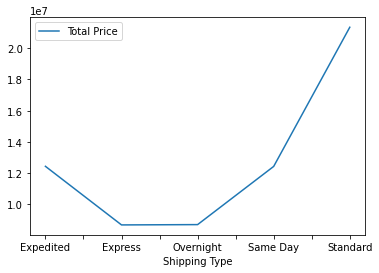

In [42]:
#2. Отобразите полученные данные на графике.

import matplotlib.pyplot as plt

ship_type.plot()
        

In [43]:
#На основании датасета получите доход:
#по каждому типу продукта

prod_type = df.groupby('Product Type').agg({
        'Total Price': 'sum'
    })

prod_type

,Total Price
Product Type,
Headphones,4041400.24
Laptop,12296239.97
Smartphone,21516754.69
Smartwatch,14036273.06
Tablet,11712000.41


<AxesSubplot:xlabel='Product Type'>

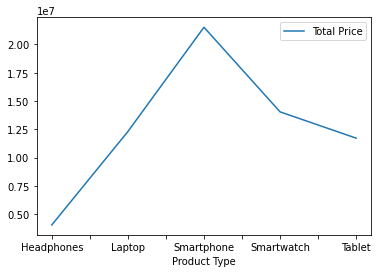

In [44]:
prod_type.plot()

In [35]:
#На основании датасета получите доход:
#по дополнительным услугам за каждый месяц

df['Mounth'] = pd.to_datetime(df['Purchase Date']).dt.month

mnth = df.groupby('Mounth').agg({
        'Add-on Total': 'sum'
    })

mnth

,Add-on Total
Mounth,
1,136195.16
2,120148.92
3,124954.26
4,123973.59
5,132018.51
6,126689.59
7,132017.20
8,135133.14
9,107531.51


<AxesSubplot:xlabel='Mounth'>

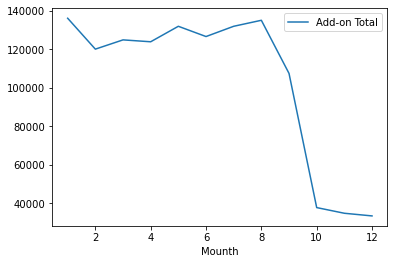

In [45]:
mnth.plot()

In [36]:
#На основании датасета получите доход:
#по дополнительным услугам за каждый квартал


df['Quarter'] = pd.to_datetime(df['Purchase Date']).dt.quarter

qrtr = df.groupby('Quarter').agg({
        'Add-on Total': 'sum'
    })

qrtr

,Add-on Total
Quarter,
1,381298.34
2,382681.69
3,374681.85
4,106235.08


<AxesSubplot:xlabel='Quarter'>

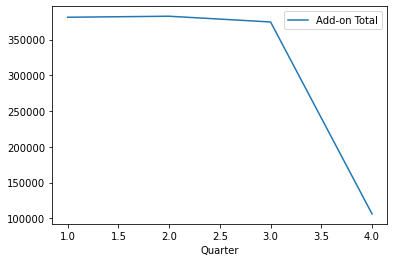

In [46]:
qrtr.plot()